## Config

In [0]:
import os

base_dir = "/content/gdrive/My Drive/Masterarbeit"
object_detection_dir = os.path.join(base_dir, "ObjectDetection")
image_classification = os.path.join(base_dir, "ImageClassification")

classes_dict_file = object_detection_dir + "/classes.pkl"
objects_dict_file = object_detection_dir + "/objects.pkl"
images_dict_file = object_detection_dir + "/images.pkl"

## Check to GPU

In [0]:
import os
import pprint
import tensorflow as tf

if 'COLAB_TPU_ADDR' not in os.environ:
  print('ERROR: Not connected to a TPU runtime; please see the first cell in this notebook for instructions!')
else:
  tpu_address = 'grpc://' + os.environ['COLAB_TPU_ADDR']
  print ('TPU address is', tpu_address)

  with tf.Session(tpu_address) as session:
    devices = session.list_devices()
    
  print('TPU devices:')
  pprint.pprint(devices)

## Mount GDrive

In [3]:
from google.colab import auth
auth.authenticate_user()

W0616 18:17:56.114068 140004167247744 lazy_loader.py:50] 
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [5]:
!gcloud config set project objectdetection-229309

Updated property [core/project].


To take a quick anonymous survey, run:
  $ gcloud alpha survey



## Import TF

In [0]:
import os
import sys

# For running inference on the TF-Hub module.
import tensorflow as tf

In [8]:
!git clone https://github.com/tensorflow/models.git /content/tf
!cd /content/tf/research; protoc object_detection/protos/*.proto --python_out=.
!cd /content/tf/research; export PYTHONPATH=$PYTHONPATH:`pwd`:`pwd`/slim; python /content/tf/research/object_detection/builders/model_builder_test.py

Cloning into '/content/tf'...
remote: Enumerating objects: 27708, done.
remote: Total 27708 (delta 0), reused 0 (delta 0), pack-reused 27708
Receiving objects: 100% (27708/27708), 509.12 MiB | 34.23 MiB/s, done.
Resolving deltas: 100% (16973/16973), done.
Checking out files: 100% (2998/2998), done.
W0616 18:19:37.970179 140556531636096 lazy_loader.py:50] 
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

W0616 18:19:38.264126 140556531636096 deprecation_wrapper.py:119] From /content/tf/research/slim/nets/inception_resnet_v2.py:373: The name tf.GraphKeys is deprecated. Please use tf.compat.v1.GraphKeys instead.

W0616 18:19:38.326794 140556531636096 deprecation_wrapper.py:119] F

In [9]:
#...
sys.path.append('tf/research')
sys.path.append('tf/research/slim')
from object_detection.utils import dataset_util, config_util
from object_detection import model_main

W0616 18:22:26.291323 140004167247744 deprecation_wrapper.py:119] From tf/research/slim/nets/inception_resnet_v2.py:373: The name tf.GraphKeys is deprecated. Please use tf.compat.v1.GraphKeys instead.

W0616 18:22:26.308012 140004167247744 deprecation_wrapper.py:119] From tf/research/slim/nets/mobilenet/mobilenet.py:397: The name tf.nn.avg_pool is deprecated. Please use tf.nn.avg_pool2d instead.



## Defines

In [0]:
class FLAGS_OD:
  image_dir = os.path.join(object_detection_dir, "Images")
  
  #tf records directory
  tf_records_dir = os.path.join(object_detection_dir, "TFRecords")
  #label_map directory
  label_map_dir = os.path.join(object_detection_dir, "LabelMaps")
  
  #class level to be considered
  class_level = [0,1]
  #how often the class of an object needs to occure to be considered
  min_class_occurence = 20
  
  #dataset split
  testing_percentage = 0
  validation_percentage = 10
  
  #pipeline config
  pipeline_config_dir = os.path.join(object_detection_dir, "ConfigFiles")
  
  #model checkpoints
  model_checkpoint_dir = os.path.join(object_detection_dir, "ModelCheckpoints")
  model_dir = os.path.join(object_detection_dir,"Models")
  
  #cloud configs
  cloud_config_dir = os.path.join(object_detection_dir, "CloudConfigFiles")

# Train Setup

## Copy Data


In [0]:
!rm -r model
!wget http://download.tensorflow.org/models/object_detection/ssd_mobilenet_v1_0.75_depth_300x300_coco14_sync_2018_07_03.tar.gz
!tar -xvf ssd_mobilenet_v1_0.75_depth_300x300_coco14_sync_2018_07_03.tar.gz
!rm ssd_mobilenet_v1_0.75_depth_300x300_coco14_sync_2018_07_03.tar.gz
!mv ssd_mobilenet_v1_0.75_depth_300x300_coco14_sync_2018_07_03 model

rm: cannot remove 'model': No such file or directory
--2019-06-11 08:23:49--  http://download.tensorflow.org/models/object_detection/ssd_mobilenet_v1_0.75_depth_300x300_coco14_sync_2018_07_03.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 173.194.193.128, 2607:f8b0:4001:c0f::80
Connecting to download.tensorflow.org (download.tensorflow.org)|173.194.193.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 46564655 (44M) [application/x-tar]
Saving to: ‘ssd_mobilenet_v1_0.75_depth_300x300_coco14_sync_2018_07_03.tar.gz’

ssd_mobilenet_v1_0. 100%[===================>]  44.41M  14.1MB/s    in 3.1s    

2019-06-11 08:23:53 (14.1 MB/s) - ‘ssd_mobilenet_v1_0.75_depth_300x300_coco14_sync_2018_07_03.tar.gz’ saved [46564655/46564655]

ssd_mobilenet_v1_0.75_depth_300x300_coco14_sync_2018_07_03/
ssd_mobilenet_v1_0.75_depth_300x300_coco14_sync_2018_07_03/model.ckpt.meta
ssd_mobilenet_v1_0.75_depth_300x300_coco14_sync_2018_07_03/checkpoint
ssd_mobilenet_v

In [0]:
!gsutil -m cp model/* gs://holoselecta_objectdetection/mobilenetv1/

Omitting directory "file://model/saved_model". (Did you mean to do cp -r?)
Copying file://model/checkpoint [Content-Type=application/octet-stream]...
Copying file://model/model.ckpt.data-00000-of-00001 [Content-Type=application/octet-stream]...
Copying file://model/frozen_inference_graph.pb [Content-Type=application/octet-stream]...
Copying file://model/model.ckpt.index [Content-Type=application/octet-stream]...
Copying file://model/pipeline.config [Content-Type=application/octet-stream]...
Copying file://model/model.ckpt.meta [Content-Type=application/octet-stream]...
- [6/6 files][ 36.5 MiB/ 36.5 MiB] 100% Done                                    
Operation completed over 6 objects/36.5 MiB.                                     


In [0]:
#change the following 3 lines to tell the script which files to copy
model = "ssd_resnet50_v1_fpn_shared_box_predictor_640x640_coco14_sync_2018_07_03"
config = "ssd_mobilenet_v1_fpn_shared_box_predictor_800x800_coco14_sync_colabTPU"

!cp /content/gdrive/My\ Drive/Masterarbeit/ObjectDetection/ConfigFiles/ssd_resnet50_v1_fpn_shared_box_predictor_640x640_holoselecta_sync_colabTPU.config pipeline.config
#!gsutil cp /content/tf/research/object_detection/data/mscoco_label_map.pbtxt gs://holoselecta_objectdetection/coco/data/label_map.pbtxt

#!gsutil -m cp gdrive/My\ Drive/Masterarbeit/ObjectDetection/Datasets/COCO/train/* gs://holoselecta_objectdetection/coco/data/
#!gsutil -m cp gdrive/My\ Drive/Masterarbeit/ObjectDetection/Datasets/COCO/val/* gs://holoselecta_objectdetection/coco/data/
  
#!gsutil -m cp model/* gs://holoselecta_objectdetection/mobilenetv2/

In [0]:
#!gsutil cp /content/gdrive/My\ Drive/Masterarbeit/ObjectDetection/LabelMaps/2019_5_28_9_24_26.pbtxt gs://holoselecta_objectdetection/holoselecta/data/label_map.pbtxt
!gsutil cp /content/gdrive/My\ Drive/Masterarbeit/ObjectDetection/TFRecords/2019_5_28_9_24_26_test_640_100.record gs://holoselecta_objectdetection/holoselecta/data/val.record
!gsutil cp /content/gdrive/My\ Drive/Masterarbeit/ObjectDetection/TFRecords/2019_5_28_9_24_26_train_640_100.record gs://holoselecta_objectdetection/holoselecta/data/train.record

Copying file:///content/gdrive/My Drive/Masterarbeit/ObjectDetection/TFRecords/2019_5_28_9_24_26_test_640_100.record [Content-Type=application/octet-stream]...
- [1 files][ 12.6 MiB/ 12.6 MiB]                                                
Operation completed over 1 objects/12.6 MiB.                                     
Copying file:///content/gdrive/My Drive/Masterarbeit/ObjectDetection/TFRecords/2019_5_28_9_24_26_train_640_100.record [Content-Type=application/octet-stream]...
\
Operation completed over 1 objects/47.1 MiB.                                     


# Run

## adapted

In [0]:
# Copyright 2018 The TensorFlow Authors. All Rights Reserved.
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.
# ==============================================================================
r"""Creates and runs `Estimator` for object detection model on TPUs.
This uses the TPUEstimator API to define and run a model in TRAIN/EVAL modes.
"""
# pylint: enable=line-too-long

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

from absl import flags
import tensorflow as tf


from object_detection import model_hparams
from object_detection import model_lib

In [12]:
tf.flags.DEFINE_bool('use_tpu', True, 'Use TPUs rather than plain CPUs')

# Cloud TPU Cluster Resolvers
flags.DEFINE_string(
    'gcp_project',
    default=None,
    help='Project name for the Cloud TPU-enabled project. If not specified, we '
    'will attempt to automatically detect the GCE project from metadata.')
flags.DEFINE_string(
    'tpu_zone',
    default=None,
    help='GCE zone where the Cloud TPU is located in. If not specified, we '
    'will attempt to automatically detect the GCE project from metadata.')
flags.DEFINE_string(
    'tpu_name',
    default=None,
    help='Name of the Cloud TPU for Cluster Resolvers.')

flags.DEFINE_integer('num_shards', 8, 'Number of shards (TPU cores).')
flags.DEFINE_integer('iterations_per_loop', 100,
                     'Number of iterations per TPU training loop.')
# For mode=train_and_eval, evaluation occurs after training is finished.
# Note: independently of steps_per_checkpoint, estimator will save the most
# recent checkpoint every 10 minutes by default for train_and_eval
flags.DEFINE_string('mode', 'train',
                    'Mode to run: train, eval')
flags.DEFINE_integer('train_batch_size', None, 'Batch size for training. If '
                     'this is not provided, batch size is read from training '
                     'config.')

flags.DEFINE_string(
    'hparams_overrides', None, 'Comma-separated list of '
    'hyperparameters to override defaults.')
flags.DEFINE_integer('num_train_steps', None, 'Number of train steps.')
flags.DEFINE_boolean('eval_training_data', False,
                     'If training data should be evaluated for this job.')
flags.DEFINE_integer('sample_1_of_n_eval_examples', 1, 'Will sample one of '
                     'every n eval input examples, where n is provided.')
flags.DEFINE_integer('sample_1_of_n_eval_on_train_examples', 5, 'Will sample '
                     'one of every n train input examples for evaluation, '
                     'where n is provided. This is only used if '
                     '`eval_training_data` is True.')
flags.DEFINE_string(
    'model_dir', None, 'Path to output model directory '
    'where event and checkpoint files will be written.')
flags.DEFINE_string('pipeline_config_path', None, 'Path to pipeline config '
                    'file.')

DuplicateFlagError: ignored

In [0]:
FLAGS = tf.flags.FLAGS

def main(unused_argv):
  flags.mark_flag_as_required('model_dir')
  flags.mark_flag_as_required('pipeline_config_path')

  tpu_grpc_url = 'grpc://' + os.environ['COLAB_TPU_ADDR']

  config = tf.contrib.tpu.RunConfig(
      master=tpu_grpc_url,
      evaluation_master=tpu_grpc_url,
      model_dir=FLAGS.model_dir,
      tpu_config=tf.contrib.tpu.TPUConfig(
          iterations_per_loop=FLAGS.iterations_per_loop,
          num_shards=FLAGS.num_shards))

  kwargs = {}
  if FLAGS.train_batch_size:
    kwargs['batch_size'] = FLAGS.train_batch_size

  train_and_eval_dict = model_lib.create_estimator_and_inputs(
      run_config=config,
      hparams=model_hparams.create_hparams(FLAGS.hparams_overrides),
      pipeline_config_path=FLAGS.pipeline_config_path,
      train_steps=FLAGS.num_train_steps,
      sample_1_of_n_eval_examples=FLAGS.sample_1_of_n_eval_examples,
      sample_1_of_n_eval_on_train_examples=(
          FLAGS.sample_1_of_n_eval_on_train_examples),
      use_tpu_estimator=True,
      use_tpu=FLAGS.use_tpu,
      num_shards=FLAGS.num_shards,
      save_final_config=FLAGS.mode == 'train',
      **kwargs)
  estimator = train_and_eval_dict['estimator']
  train_input_fn = train_and_eval_dict['train_input_fn']
  eval_input_fns = train_and_eval_dict['eval_input_fns']
  eval_on_train_input_fn = train_and_eval_dict['eval_on_train_input_fn']
  train_steps = train_and_eval_dict['train_steps']

  if FLAGS.mode == 'train':
    estimator.train(input_fn=train_input_fn, max_steps=train_steps)

  # Continuously evaluating.
  if FLAGS.mode == 'eval':
    if FLAGS.eval_training_data:
      name = 'training_data'
      input_fn = eval_on_train_input_fn
    else:
      name = 'validation_data'
      # Currently only a single eval input is allowed.
      input_fn = eval_input_fns[0]
    model_lib.continuous_eval(estimator, FLAGS.model_dir, input_fn, train_steps,
                              name)

In [0]:
!cp /content/gdrive/My\ Drive/Masterarbeit/ObjectDetection/ConfigFiles/ssd_resnet50_v1_fpn_shared_box_predictor_640x640_holoselecta_sync_colabTPU.config pipeline.config
#!cp /content/gdrive/My\ Drive/Masterarbeit/ObjectDetection/ConfigFiles/ssd_mobilenet_v1_075_320x320_holoselecta_sync_colabTPU.config pipeline.config
#!cp /content/gdrive/My\ Drive/Masterarbeit/ObjectDetection/ConfigFiles/ssd_mobilenet_v1_ppn_320x320_holoselecta_sync_colabTPU.config pipeline.config

In [15]:
from subprocess import call

FLAGS.pipeline_config_path = "pipeline.config"

for res in [320]:
  for it in [6,3,1]:
    ret1 = call('gsutil cp /content/gdrive/My\ Drive/Masterarbeit/ObjectDetection/TFRecords/2019_6_15_15_31_42_test_{}_{}.record gs://holoselecta_objectdetection/holoselecta/dataTPU/val.record'.format(res,it), shell=True)
    ret2 = call('gsutil cp /content/gdrive/My\ Drive/Masterarbeit/ObjectDetection/TFRecords/2019_6_15_15_31_42_train_{}_{}.record gs://holoselecta_objectdetection/holoselecta/dataTPU/train.record'.format(res,it), shell=True)
    ret2 = call('gsutil cp /content/gdrive/My\ Drive/Masterarbeit/ObjectDetection/LabelMaps/2019_6_15_15_31_42.pbtxt gs://holoselecta_objectdetection/holoselecta/dataTPU/label_map.pbtxt', shell=True)

    FLAGS.model_dir = "gs://holoselecta_objectdetection/retinanet_4/{}/{}/".format(res,it)

    try:
      tf.app.run(main)
    except:
      print("################  {}  ###############".format(it))
  

W0616 18:23:03.388182 140004167247744 deprecation_wrapper.py:119] From tf/research/object_detection/utils/config_util.py:98: The name tf.gfile.GFile is deprecated. Please use tf.io.gfile.GFile instead.

W0616 18:23:03.410042 140004167247744 deprecation_wrapper.py:119] From tf/research/object_detection/model_lib.py:614: The name tf.logging.warning is deprecated. Please use tf.compat.v1.logging.warning instead.

W0616 18:23:03.417460 140004167247744 model_lib.py:615] Forced number of epochs for all eval validations to be 1.
W0616 18:23:03.423609 140004167247744 deprecation_wrapper.py:119] From tf/research/object_detection/utils/config_util.py:484: The name tf.logging.info is deprecated. Please use tf.compat.v1.logging.info instead.

I0616 18:23:03.428724 140004167247744 config_util.py:484] Maybe overwriting train_steps: None
I0616 18:23:03.430088 140004167247744 config_util.py:484] Maybe overwriting sample_1_of_n_eval_examples: 1
I0616 18:23:03.432894 140004167247744 config_util.py:484] 

################  6  ###############


W0616 18:48:20.986990 140004167247744 model_lib.py:615] Forced number of epochs for all eval validations to be 1.
I0616 18:48:20.989249 140004167247744 config_util.py:484] Maybe overwriting train_steps: None
I0616 18:48:21.006219 140004167247744 config_util.py:484] Maybe overwriting sample_1_of_n_eval_examples: 1
I0616 18:48:21.007984 140004167247744 config_util.py:484] Maybe overwriting use_bfloat16: False
I0616 18:48:21.013938 140004167247744 config_util.py:484] Maybe overwriting eval_num_epochs: 1
I0616 18:48:21.020242 140004167247744 config_util.py:484] Maybe overwriting load_pretrained: True
I0616 18:48:21.021588 140004167247744 config_util.py:494] Ignoring config override key: load_pretrained
W0616 18:48:21.022927 140004167247744 model_lib.py:631] Expected number of evaluation epochs is 1, but instead encountered `eval_on_train_input_config.num_epochs` = 0. Overwriting `num_epochs` to 1.
I0616 18:48:21.024160 140004167247744 model_lib.py:666] create_estimator_and_inputs: use_tpu 

################  3  ###############


W0616 19:13:44.851822 140004167247744 model_lib.py:615] Forced number of epochs for all eval validations to be 1.
I0616 19:13:44.854106 140004167247744 config_util.py:484] Maybe overwriting train_steps: None
I0616 19:13:44.870169 140004167247744 config_util.py:484] Maybe overwriting sample_1_of_n_eval_examples: 1
I0616 19:13:44.874745 140004167247744 config_util.py:484] Maybe overwriting use_bfloat16: False
I0616 19:13:44.876229 140004167247744 config_util.py:484] Maybe overwriting eval_num_epochs: 1
I0616 19:13:44.877459 140004167247744 config_util.py:484] Maybe overwriting load_pretrained: True
I0616 19:13:44.880344 140004167247744 config_util.py:494] Ignoring config override key: load_pretrained
W0616 19:13:44.881646 140004167247744 model_lib.py:631] Expected number of evaluation epochs is 1, but instead encountered `eval_on_train_input_config.num_epochs` = 0. Overwriting `num_epochs` to 1.
I0616 19:13:44.883968 140004167247744 model_lib.py:666] create_estimator_and_inputs: use_tpu 

################  1  ###############


In [0]:
  
#from datetime import datetime
#now = datetime.now()
#timestamp = "_".join([str(now.year), str(now.month), str(now.day), str(now.hour), str(now.minute), str(now.second)])

!gsutil cp /content/gdrive/My\ Drive/Masterarbeit/ObjectDetection/TFRecords/2019_5_28_9_24_26_test_320_1000.record gs://holoselecta_objectdetection/holoselecta/data/val.record
!gsutil cp /content/gdrive/My\ Drive/Masterarbeit/ObjectDetection/TFRecords/2019_5_28_9_24_26_train_320_1000.record gs://holoselecta_objectdetection/holoselecta/data/train.record
  
  
FLAGS.pipeline_config_path = "pipeline.config"
FLAGS.model_dir = "gs://holoselecta_objectdetection/mobilenetv1/320/1000/"

tf.app.run(main)

# Visualize Results

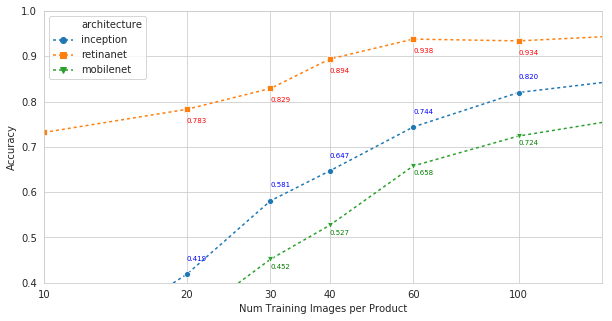

In [17]:
%matplotlib inline
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns


data = [
        ["inception",1000, 0.945],
        ["inception",100 , 0.820],
        ["inception",60  , 0.744],
        ["inception",40  , 0.647],
        ["inception",30  , 0.581],
        ["inception",20  , 0.419],
        ["inception",10  , 0.216],
        ["retinanet",1000, 0.986],
        ["retinanet",100 , 0.934],
        ["retinanet",60  , 0.938],
        ["retinanet",40  , 0.894],
        ["retinanet",30  , 0.829],
        ["retinanet",20  , 0.783],
        ["retinanet",10  , 0.732],
        ["mobilenet",1000, 0.894],
        ["mobilenet",100 , 0.724],
        ["mobilenet",60  , 0.658],
        ["mobilenet",40  , 0.527],
        ["mobilenet",30  , 0.452],
        ["mobilenet",20  , 0.315],
        ["mobilenet",10  , 0.191],
       ]

data = pd.DataFrame(data,columns=["architecture","k","score"])


# Plot the responses for different events and regions
sns.set_style("whitegrid")
f, ax = plt.subplots(figsize=(10, 5))
ax.set(xscale="log")
g = sns.lineplot(x="k", y="score",
                 hue= "architecture",
                 style = "architecture",
                 ax=ax,
                 data=data,
                 markers=['o','s','v'],
                 dashes=[(2,2),(2,2),(2,2)])
plt.legend(loc='upper left')
g.set(xlim = (10,150))
#xlabels = ['{}'.format(int(x)) for x in g.get_xticks()]
xticks = [10, 20, 30, 40, 60, 100]
xlabels = [10, 20, 30, 40, 60, 100]
g.set_xticks(xticks)
g.set_xticklabels(xlabels)
g.set(ylim = (0.4,1.0))
ax.set(xlabel='Num Training Images per Product', ylabel='Accuracy')
for index, row in data.iterrows():
  r = row.values
  if r[1] < 15:
    continue
  elif r[1] < 25 and r[0] == "mobilenet":
    continue
  elif r[1] > 110:
    continue
  if r[0] == "inception":
    c = "b"
    o = 0.03
  elif r[0] == "mobilenet":
    c = "g"
    o = -0.02
  elif r[0] == "retinanet":
    c = "r"
    o = -0.03
  plt.text(r[1], r[2]+o,
           "{:.3f}".format(r[2]),
           fontsize=7,
           color=c) #TODO set color similar to text

# Copy & Save

In [0]:
import shutil
import os

timestamp = "2019_5_7_19_42_14"

with open("test_model/{}/README.md".format(timestamp), "+w") as f:
  f.write("# Model Description  \n")
  f.write("Model: SSD, Resnet 50, Focal Point Network (FPN), Shared Box Predictor, (aka RetinaNet)  \n")
  f.write("Input Resolution: 640 x 640  \n")
  f.write("Classes: 38  \n")
  f.write("Training Images: _Automat  \n")
  f.write("Dataset Timestamp: 2019_5_7_12_50_41  \n")
  f.write("Training Steps: 7000  \n")
  f.write("Final mAP@.50IOU = 0.69 ; mAP@.75IOU = 0.60  \n")
  f.write("Max Score Steps: 7000")

shutil.copy("model/frozen_inference_graph.pb", "test_model/{}/frozen_inference_graph.pb".format(timestamp))
shutil.copy("data/label_map.pbtxt", "test_model/{}/label_map.pbtxt".format(timestamp))
shutil.copy("pipeline.config", "test_model/{}/pipeline.config".format(timestamp))
shutil.copy("timestamp", "test_model/{}/timestamp".format(timestamp))

shutil.copytree("test_model/{}".format(timestamp), os.path.join(FLAGS_OD.model_dir, "Good", timestamp))

'/content/gdrive/My Drive/Masterarbeit/ObjectDetection/Models/Good/2019_5_7_19_42_14'

# Stuff

These resolutions are problematic because we keep an entire queue of images in memory, not just the batch that you are currently training on. See e.g. the queue_capacity and min_after_dequeue parameters in https://github.com/tensorflow/models/blob/master/object_detection/protos/input_reader.proto